In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from IPython.display import display

In [2]:
# 🔐 Verbindung zur Datenbank
DB_PARAMS = {
    'user': 'postgres',
    'password': 'Datacraft', #<----ggf anpassen
    'host': 'localhost',
    'port': 5432,
    'database': 'redezeit'
}

# Verbindung-URL erstellen
url = URL.create(
    drivername="postgresql+psycopg2",
    username=DB_PARAMS['user'],
    password=DB_PARAMS['password'],
    host=DB_PARAMS['host'],
    port=DB_PARAMS['port'],
    database=DB_PARAMS['database']
)

# Engine erstellen
engine = create_engine(url)

In [3]:
query = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
"""
tables_df = pd.read_sql(query, engine)
tables_df

,table_name
0,landingpage
1,datum_index
2,user_behaviors
3,what_did_user_do
4,where_did_they_come_from
5,what_devices_used
6,where_new_visitors_come_from
7,who_was_visiting


In [11]:
for table_name in tables_df['table_name']:
    print(f"\n📄 Tabelle: {table_name}")
    print("=" * 70)
    try:
        df = pd.read_sql(f'SELECT * FROM "{table_name}"', engine)
        display(df.describe(include='all'))
    except Exception as e:
        print(f"⚠️ Fehler bei Tabelle '{table_name}': {e}")



📄 Tabelle: datum_index


,datum
count,903
unique,903
top,2025-06-21
freq,1



📄 Tabelle: landingpage


,datum,eid,seitentitel,aufrufe
count,16634,16634,16634,16634
unique,902,40,343,181
top,2024-07-16,1.0,Ich brauche Redezeit. | REDEZEIT FÜR DICH #vir...,1.0
freq,40,888,799,4668



📄 Tabelle: user_behaviors


,datum,seitenaufrufe,nutzer_insgesamt,durchschn._zeit_auf_der_seite,absprungrate,seiten_/_sitzung
count,894,894,894,894,894,894
unique,894,268,124,151,516,291
top,2025-06-12,99.0,54,00:01:30,0.00%,1.08
freq,1,17,20,21,34,42



📄 Tabelle: what_did_user_do


,datum,eid,name_des_events,even_label,aktive_nutzer,ereignisanzahl
count,19119,19119,19119,19119,19119,19119
unique,629,295,5,600,12,27
top,2023-11-07,1.0,Checked,Weiblich,1,1
freq,295,621,8233,522,15999,12802



📄 Tabelle: where_did_they_come_from


,datum,eid,quelle,sitzungen,aufrufe,aufrufe_pro_sitzung
count,7469,7469,7469,7469,7469,7469
unique,897,20,308,111,186,534
top,2024-02-05,2.0,(direct),1,1.0,1.0
freq,20,892,892,3433,2338,3134



📄 Tabelle: what_devices_used


,datum,kategorie,wert
count,2246,2246,2246
unique,861,4,232
top,2023-10-24,mobile,1.0
freq,4,861,173



📄 Tabelle: where_new_visitors_come_from


,datum,kategorie,wert
count,7228,7228,7228
unique,903,301,90
top,2023-01-09,(direct),1
freq,10,903,2999



📄 Tabelle: who_was_visiting


,datum,kategorie,wert
count,630,630,630
unique,509,2,27
top,2023-05-15,female,10
freq,2,496,98


In [14]:
# Für jede Tabelle: 5 zufällige Zeilen anzeigen
for table_name in tables_df['table_name']:
    print(f"\n🎲 Zufällige Zeilen aus Tabelle: {table_name}")
    print("=" * 70)
    try:
        df = pd.read_sql(f'SELECT * FROM "{table_name}" ORDER BY RANDOM() LIMIT 5', engine)
        display(df)
    except Exception as e:
        print(f"⚠️ Fehler beim Laden der Tabelle '{table_name}': {e}")


🎲 Zufällige Zeilen aus Tabelle: datum_index


,datum
0,2023-03-29
1,2023-09-08
2,2025-04-02
3,2024-09-29
4,2024-01-21



🎲 Zufällige Zeilen aus Tabelle: landingpage


,datum,eid,seitentitel,aufrufe
0,2024-07-11,21.0,"Einsamkeit heute: Verstehen, akzeptieren und h...",0.0
1,2025-03-01,1.0,Ich brauche Redezeit. | REDEZEIT FÜR DICH #vir...,21.0
2,2024-08-24,9.0,Lesezeit – das Redezeit Blog. | REDEZEIT FÜR D...,1.0
3,2023-04-01,15.0,Start | REDEZEIT FÜR DICH #virtualsupporttalks,2.0
4,2024-09-29,6.0,Wie Du das Kopfkino stoppen und Deine psychisc...,6.0



🎲 Zufällige Zeilen aus Tabelle: user_behaviors


,datum,seitenaufrufe,nutzer_insgesamt,durchschn._zeit_auf_der_seite,absprungrate,seiten_/_sitzung
0,2024-08-16,127.0,63,00:01:31,32.35%,1.87
1,2023-08-26,167.0,36,00:01:27,2.63%,4.71
2,2025-03-04,106.0,83,00:01:42,33.33%,1.07
3,2023-08-30,265.0,56,00:01:39,6.45%,4.27
4,2023-03-28,343.0,84,00:01:29,5.94%,3.92



🎲 Zufällige Zeilen aus Tabelle: what_did_user_do


,datum,eid,name_des_events,even_label,aktive_nutzer,ereignisanzahl
0,2024-10-12,9.0,Website,Judith Wälde,1,1
1,2024-05-31,11.0,Website,Kristina Wrede,1,1
2,2023-12-22,22.0,Email,Jürgen Salzmann,1,1
3,2023-12-23,2.0,Checked,Depression,2,5
4,2025-03-24,4.0,Website,Monika Feldmann,2,2



🎲 Zufällige Zeilen aus Tabelle: where_did_they_come_from


,datum,eid,quelle,sitzungen,aufrufe,aufrufe_pro_sitzung
0,2024-08-02,1.0,google,49,57.0,1.16
1,2025-04-16,7.0,ptbs-selbsthilfeforum.de,1,1.0,1.0
2,2024-05-30,4.0,ig,2,2.0,1.0
3,2024-03-27,6.0,bing,2,1.0,0.5
4,2024-02-21,1.0,google,47,50.0,1.06



🎲 Zufällige Zeilen aus Tabelle: what_devices_used


,datum,kategorie,wert
0,2023-10-16,tablet,5.0
1,2025-04-30,tablet,1.0
2,2024-10-29,tablet,1.0
3,2025-01-03,desktop,41.0
4,2025-01-09,desktop,65.0



🎲 Zufällige Zeilen aus Tabelle: where_new_visitors_come_from


,datum,kategorie,wert
0,2024-03-15,(direct),12
1,2024-11-25,handbookgermany.de,0
2,2024-12-28,bing,1
3,2023-09-26,bdkv.de,1
4,2023-09-28,(direct),11



🎲 Zufällige Zeilen aus Tabelle: who_was_visiting


,datum,kategorie,wert
0,2025-04-23,female,13
1,2024-09-14,female,17
2,2025-05-19,female,15
3,2024-09-24,male,10
4,2023-11-03,female,12


<Axes: title={'center': 'Besuche pro Tag'}, xlabel='datum'>

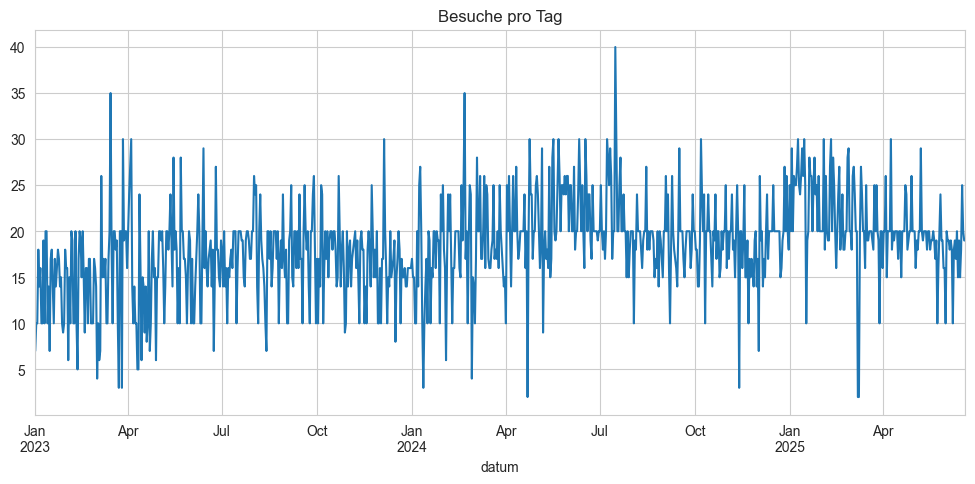

In [15]:
# Wieviele Besuche gab es pro Tag?
df = pd.read_sql('SELECT datum FROM landingpage', engine)
df['datum'] = pd.to_datetime(df['datum'])
df['datum'].value_counts().sort_index().plot(figsize=(12,5), title="Besuche pro Tag")

<Axes: title={'center': 'Geräteverteilung'}>

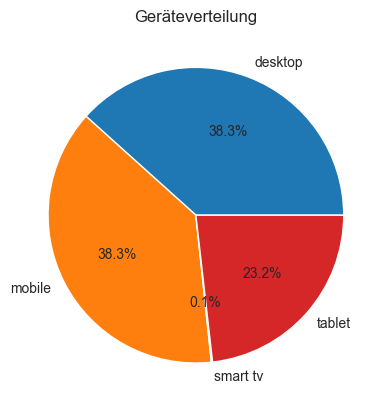

In [25]:
# Geschlechterverteilung
df = pd.read_sql('SELECT datum, kategorie FROM what_devices_used', engine)
df.groupby('kategorie').size().plot(kind='pie', autopct='%1.1f%%', title="Geräteverteilung")

Silhouette Score: 0.28


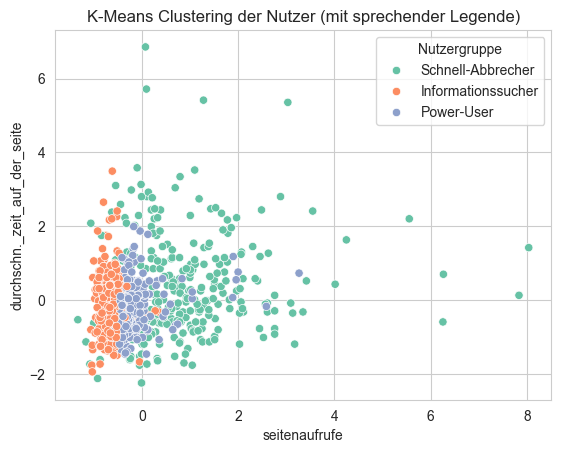

,seitenaufrufe,nutzer_insgesamt,durchschn._zeit_auf_der_seite,absprungrate,seiten_/_sitzung
cluster_label,,,,,
Informationssucher,71.699405,56.425595,94.797619,34.130417,1.140506
Power-User,120.729412,93.811765,92.619608,35.158431,1.150353
Schnell-Abbrecher,216.433581,36.056106,110.181518,6.919340,5.461881


In [46]:
# Daten laden
df = pd.read_sql('SELECT * FROM user_behaviors', engine)

# Zeit in Sekunden umwandeln
df['durchschn._zeit_auf_der_seite'] = pd.to_timedelta(
    df['durchschn._zeit_auf_der_seite'], errors='coerce'
).dt.total_seconds()

# Prozentzeichen entfernen bei Absprungrate
df['absprungrate'] = df['absprungrate'].str.replace('%', '', regex=False).astype(float)

# Features fürs Clustering
features = [
    'seitenaufrufe',
    'nutzer_insgesamt',
    'durchschn._zeit_auf_der_seite',
    'absprungrate',
    'seiten_/_sitzung'
]

# Daten bereinigen
df_cluster = df[features].copy()
df_cluster = df_cluster.fillna(0)

# Skalierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Finales Clustering (mit 3 Clustern)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Silhouette Score
score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {score:.2f}")

# Cluster-Labels zuweisen
cluster_labels = {
    0: "Informationssucher",
    1: "Power-User",
    2: "Schnell-Abbrecher"
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Visualisierung
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 2],
    hue=df['cluster_label'], palette='Set2'
)
plt.xlabel(features[0])
plt.ylabel(features[2])
plt.title("K-Means Clustering der Nutzer (mit sprechender Legende)")
plt.legend(title="Nutzergruppe")
plt.show()

# Clusterstatistik (optional)
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.groupby('cluster_label')[features].mean()

Lade und aggregiere: user_behaviors
Lade und aggregiere: what_devices_used
Lade und aggregiere: who_was_visiting
Lade und aggregiere: where_new_visitors_come_from
Lade und aggregiere: what_did_user_do
Korrelationsmatrix:


,seitenaufrufe,nutzer_insgesamt,zeit_in_sekunden,absprungrate_in_prozent,seiten_pro_sitzung,mobile,desktop,female,male,new_visitors,aktive_nutzer
seitenaufrufe,1.000000,0.252618,0.227633,-0.274149,0.873965,0.662270,0.928364,0.171107,0.298812,0.266021,0.181620
nutzer_insgesamt,0.252618,1.000000,-0.033050,0.019493,-0.040685,0.399787,0.125626,0.638704,0.502147,0.858001,0.320233
zeit_in_sekunden,0.227633,-0.033050,1.000000,-0.357682,0.198532,0.156093,0.214020,-0.014774,0.038856,0.016187,0.342537
absprungrate_in_prozent,-0.274149,0.019493,-0.357682,1.000000,-0.295970,-0.278048,-0.210975,0.082810,-0.069975,-0.041866,-0.082008
seiten_pro_sitzung,0.873965,-0.040685,0.198532,-0.295970,1.000000,0.503564,0.853094,-0.045039,0.092146,-0.060749,0.041037
mobile,0.662270,0.399787,0.156093,-0.278048,0.503564,1.000000,0.348881,0.381895,0.335212,0.481012,0.219778
desktop,0.928364,0.125626,0.214020,-0.210975,0.853094,0.348881,1.000000,0.025402,0.212832,0.105582,0.119863
female,0.171107,0.638704,-0.014774,0.082810,-0.045039,0.381895,0.025402,1.000000,0.274344,0.664275,0.274070
male,0.298812,0.502147,0.038856,-0.069975,0.092146,0.335212,0.212832,0.274344,1.000000,0.557944,0.285372
new_visitors,0.266021,0.858001,0.016187,-0.041866,-0.060749,0.481012,0.105582,0.664275,0.557944,1.000000,0.329450


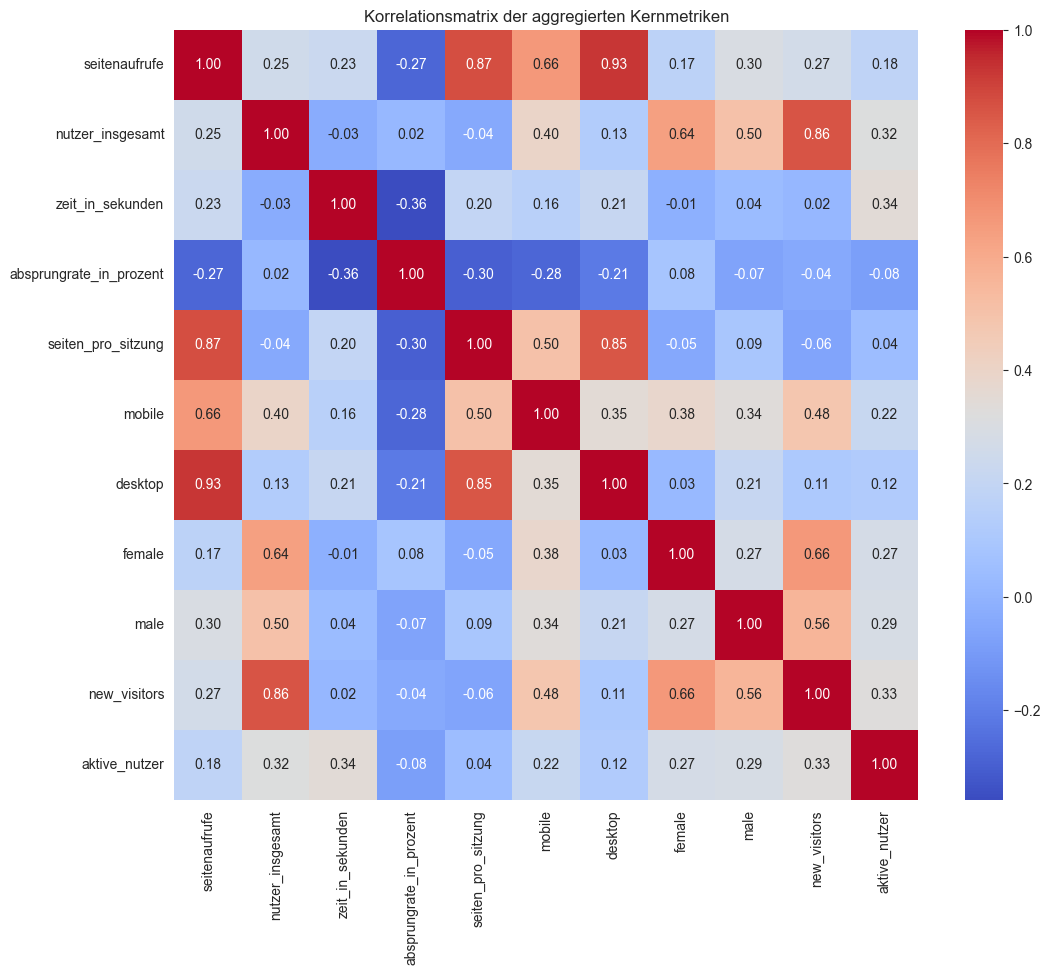

In [8]:
import pandas as pd

agg_queries = {
    'user_behaviors': """
        SELECT datum,
               SUM(seitenaufrufe) AS seitenaufrufe,
               SUM(nutzer_insgesamt) AS nutzer_insgesamt,
               AVG(zeit_in_sekunden) AS zeit_in_sekunden,
               AVG(absprungrate_in_prozent) AS absprungrate_in_prozent,
               AVG("seiten_/_sitzung") AS seiten_pro_sitzung
        FROM user_behaviors
        GROUP BY datum
        ORDER BY datum
    """,
    # 'where_did_they_come_from': """
    #     SELECT datum,
    #            SUM(sitzungen) AS sitzungen,
    #            SUM(aufrufe) AS aufrufe,
    #            AVG(aufrufe_pro_sitzung) AS aufrufe_pro_sitzung
    #     FROM where_did_they_come_from
    #     GROUP BY datum
    #     ORDER BY datum
    # """,
    'what_devices_used': """
        SELECT datum,
               SUM(CASE WHEN kategorie='mobile' THEN wert ELSE 0 END) AS mobile,
               SUM(CASE WHEN kategorie='desktop' THEN wert ELSE 0 END) AS desktop
        FROM what_devices_used
        GROUP BY datum
        ORDER BY datum
    """,
    'who_was_visiting': """
        SELECT datum,
               SUM(CASE WHEN kategorie='female' THEN wert ELSE 0 END) AS female,
               SUM(CASE WHEN kategorie='male' THEN wert ELSE 0 END) AS male
        FROM who_was_visiting
        GROUP BY datum
        ORDER BY datum
    """,
    'where_new_visitors_come_from': """
        SELECT datum,
               SUM(wert) AS new_visitors
        FROM where_new_visitors_come_from
        GROUP BY datum
        ORDER BY datum
    """,
    'what_did_user_do': """
        SELECT datum,
               SUM(aktive_nutzer) AS aktive_nutzer
        FROM what_did_user_do
        GROUP BY datum
        ORDER BY datum
    """,
    #'landingpage': """
    #    SELECT datum,
    #           SUM(aufrufe) AS landingpage_aufrufe
    #    FROM landingpage
    #    GROUP BY datum
    #    ORDER BY datum
    #"""
}

dfs = []

for table, query in agg_queries.items():
    print(f"Lade und aggregiere: {table}")
    df = pd.read_sql(query, engine)
    df.set_index('datum', inplace=True)
    dfs.append(df)

# Alle auf Datum joinen (inner join: nur gemeinsame Tage)
merged_df = pd.concat(dfs, axis=1, join='inner')

# Korrelationsmatrix
corr = merged_df.corr()

print("Korrelationsmatrix:")
display(corr)


plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix der aggregierten Kernmetriken")
plt.show()

